In [1]:
import pandas as pd
keyword_matrix_neurips = pd.read_csv('keyword_counts_neurips.csv')
keyword_matrix_icml = pd.read_csv('keyword_counts_icml.csv')

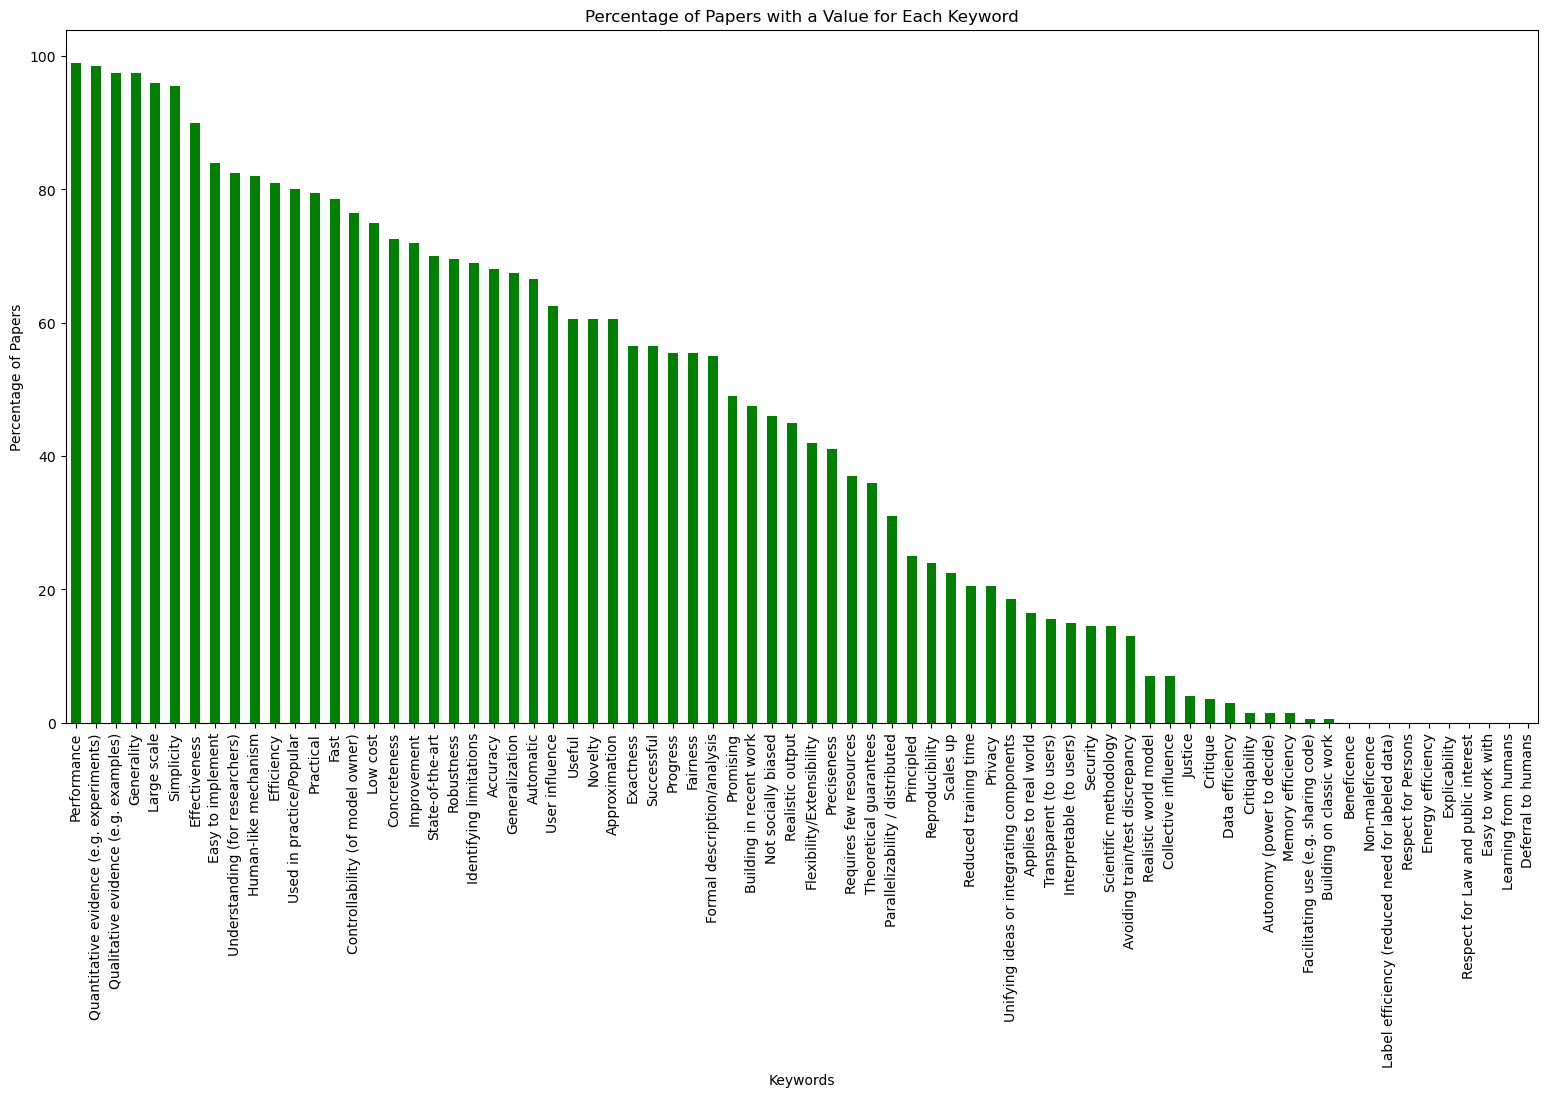

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# Combine the two dataframes
combined_df = pd.concat([keyword_matrix_neurips, keyword_matrix_icml])

# Calculate the percentage of papers with a value for each keyword
percentage_with_value = (combined_df.iloc[:, 1:] > 0).mean() * 100

# Plot the percentages
plt.figure(figsize=(19, 9))
percentage_with_value.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Percentage of Papers with a Value for Each Keyword')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers')
plt.xticks(rotation=90)
plt.show()

In [3]:
# Read the values.csv file
values_df = pd.read_csv('values.csv')

# Merge values_df with percentage_with_value
merged_df = values_df.merge(percentage_with_value.reset_index(), left_on='Value', right_on='index')
merged_df.drop('index', axis=1, inplace=True)

# rename columns to value, birhane percentage and percentage 2023
merged_df.columns = ['Value', 'Birhane Percentage', 'Percentage 2023']
merged_df

,Value,Birhane Percentage,Percentage 2023
0,Performance,96.0,99.0
1,Generalization,89.0,67.5
2,Quantitative evidence (e.g. experiments),85.0,98.5
3,Efficiency,84.0,81.0
4,Novelty,77.0,60.5
...,...,...,...
56,Fairness,1.0,55.5
57,Collective influence,1.0,7.0
58,Autonomy (power to decide),0.0,1.5
59,Respect for Persons,0.0,0.0


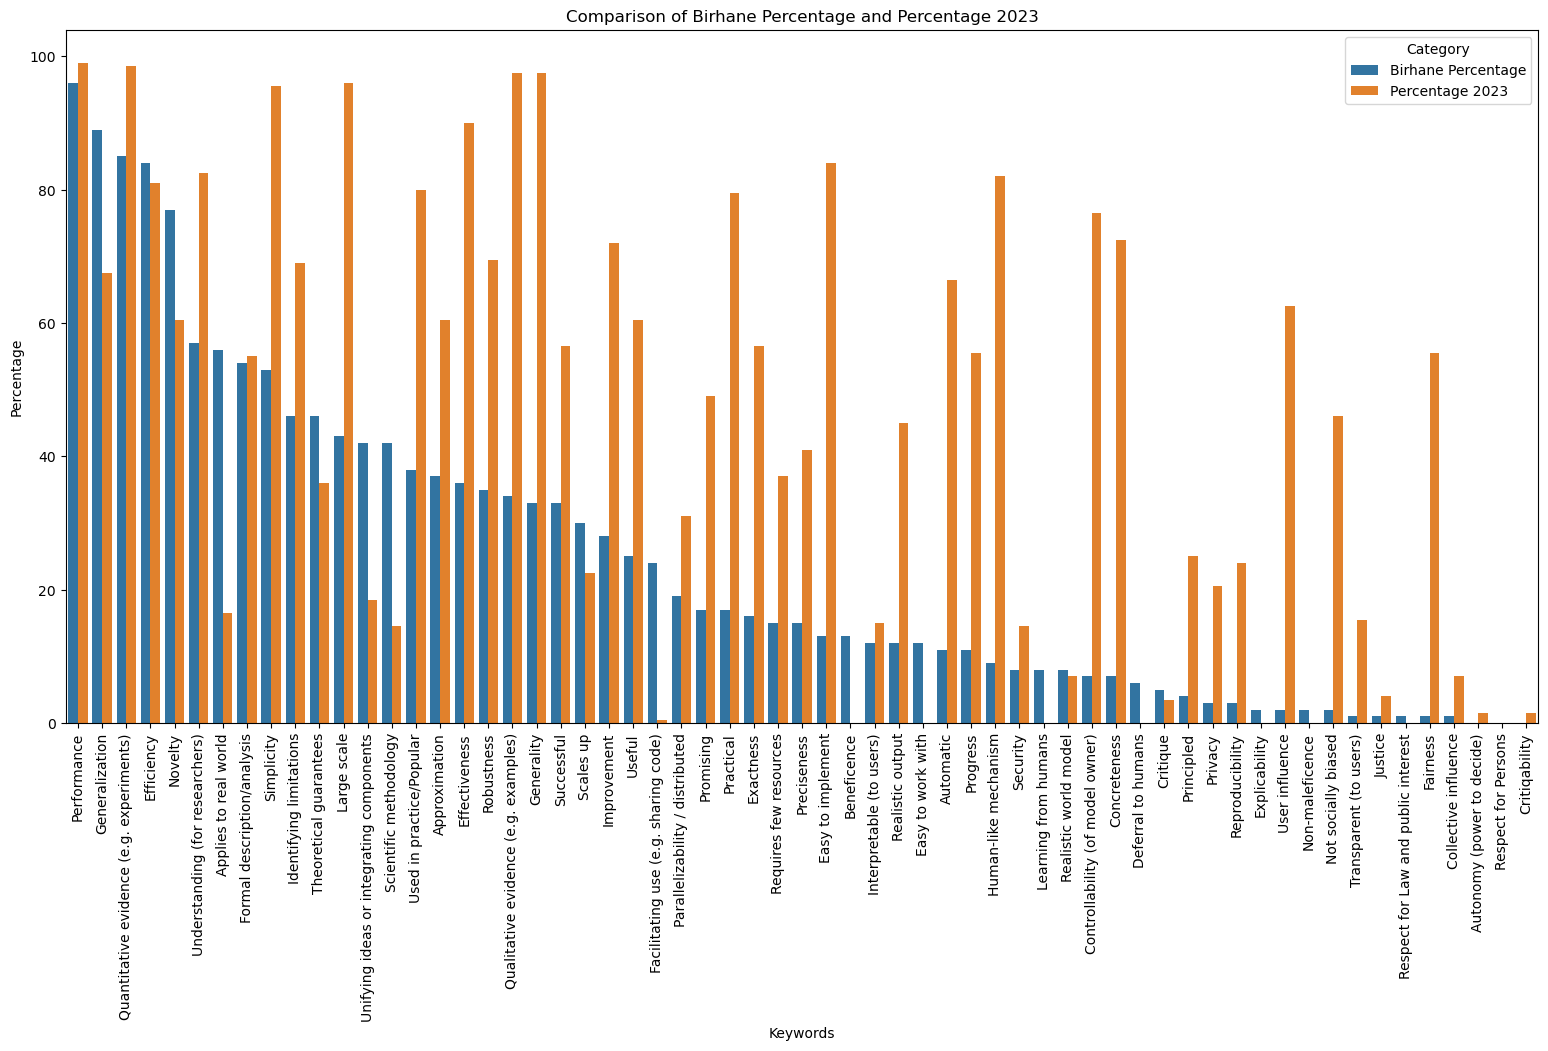

In [4]:
import seaborn as sns

# Melt the dataframe for easier plotting with seaborn
melted_df = merged_df.melt(id_vars='Value', var_name='Category', value_name='Percentage')

# Plot using seaborn
plt.figure(figsize=(19, 9))
sns.barplot(data=melted_df, x='Value', y='Percentage', hue='Category')
plt.title('Comparison of Birhane Percentage and Percentage 2023')
plt.xlabel('Keywords')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

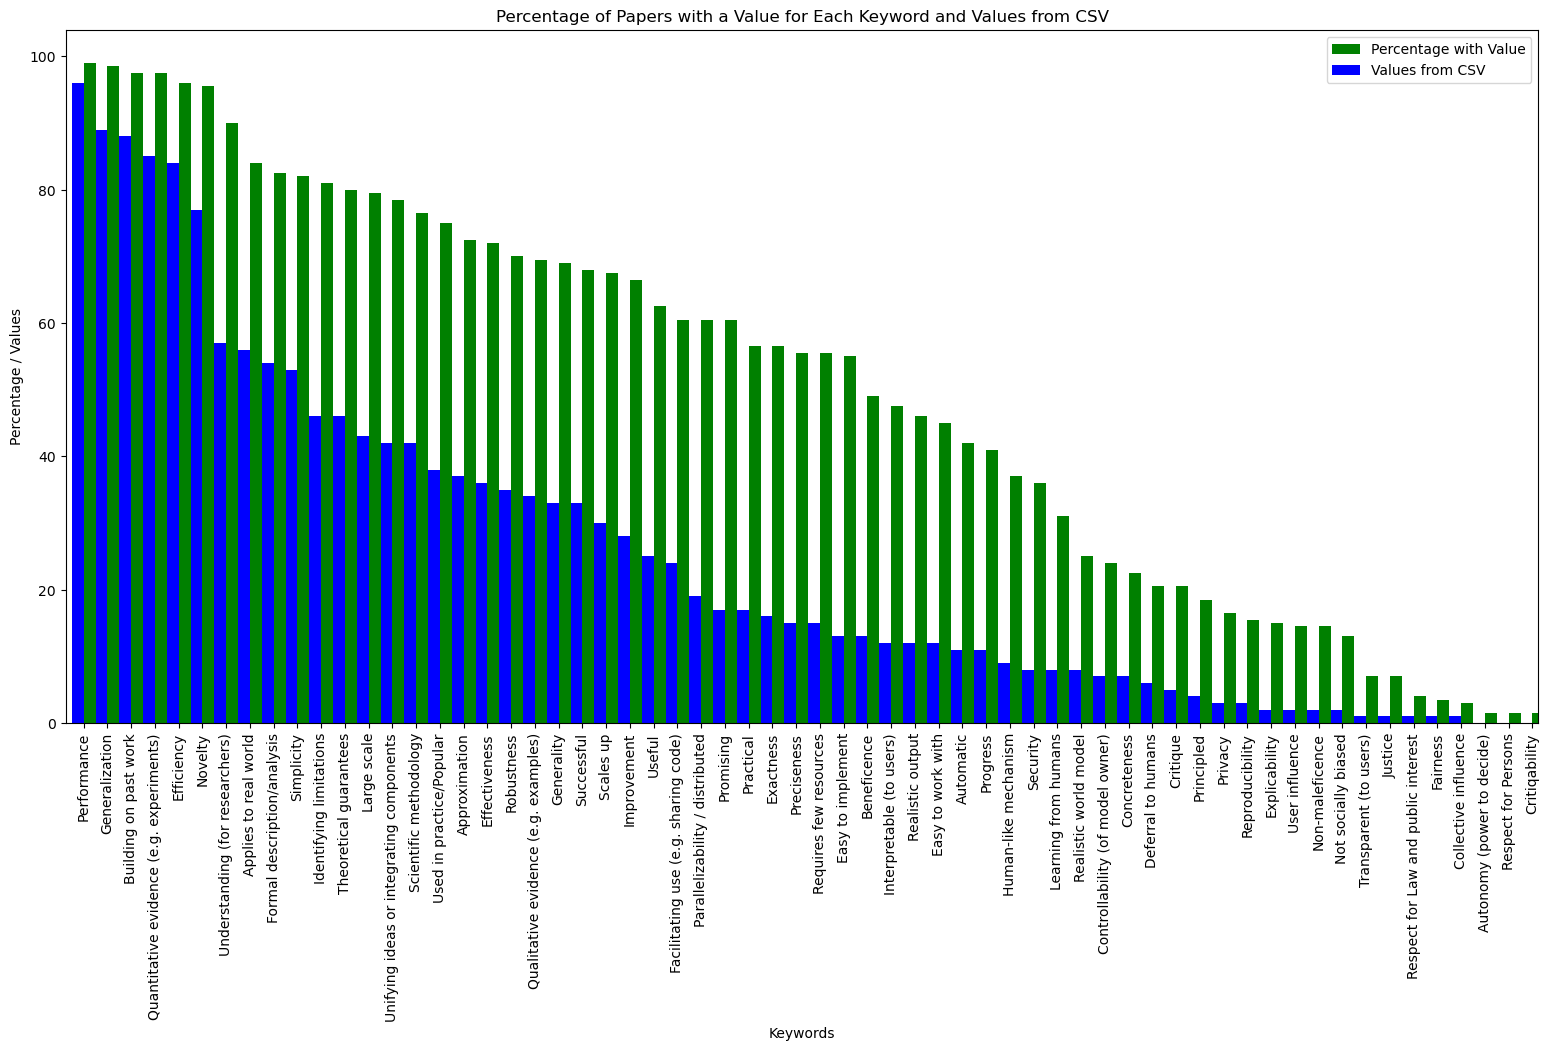

In [5]:
# Plot the percentages from combined_df
plt.figure(figsize=(19, 9))
percentage_with_value.sort_values(ascending=False).plot(kind='bar', color='green', position=0, label='Percentage with Value')

# Plot the values from values.csv
values_df.set_index('Value').sort_values(by='Percent of papers', ascending=False)['Percent of papers'].plot(kind='bar', color='blue', position=1, label='Values from CSV')

# Add legend
plt.legend()
plt.title('Percentage of Papers with a Value for Each Keyword and Values from CSV')
plt.xlabel('Keywords')
plt.ylabel('Percentage / Values')
plt.xticks(rotation=90)
plt.show()

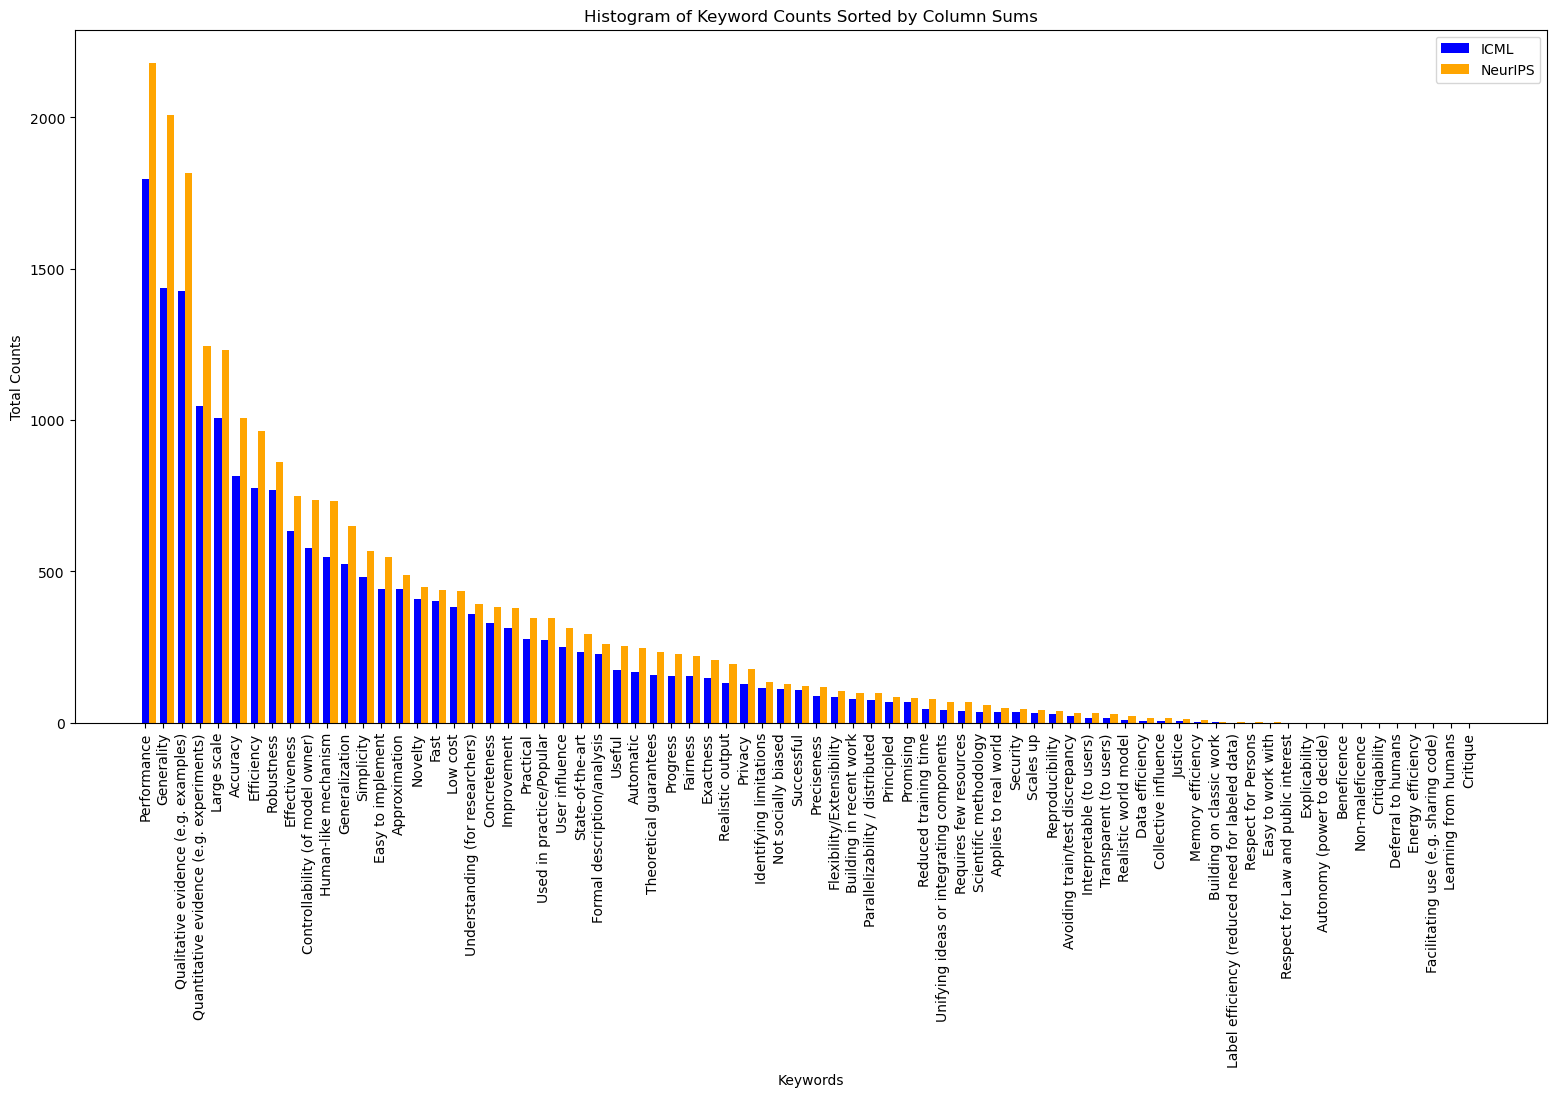

In [6]:
# Calculate the column sums
column_sums_icml = keyword_matrix_icml.iloc[:, 1:].sum().sort_values(ascending=False)
column_sums_neurips = keyword_matrix_neurips.iloc[:, 1:].sum().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(19, 9))
width = 0.4  # the width of the bars

# Create positions for the bars
positions_icml = range(len(column_sums_icml))
positions_neurips = [p + width for p in positions_icml]

# Plot the bars
plt.bar(positions_icml, column_sums_icml, width=width, label='ICML', color='blue')
plt.bar(positions_neurips, column_sums_neurips, width=width, label='NeurIPS', color='orange')

# Add legend
plt.legend()
plt.title('Histogram of Keyword Counts Sorted by Column Sums')
plt.xlabel('Keywords')
plt.ylabel('Total Counts')
plt.xticks(ticks=positions_icml, labels=column_sums_icml.index, rotation=90)
plt.show()